In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [112]:
df_test=pd.read_csv(r'C:\Users\karth\Factor-Hair-Revised (1).csv')

In [113]:
df=df_test.copy()

In [114]:
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [76]:
df.duplicated().sum()


0

In [78]:
df.isnull().values.any()
 

False

In [71]:
df.head(5)

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [117]:
df.tail()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4
99,100,7.9,3.0,4.4,5.1,5.9,4.2,4.8,9.7,5.7,3.4,3.5,6.4


In [118]:
#Missing Value Analysis
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [50]:
df.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

Drop ID,Satisfication columns as satisfaction is the target variable

In [119]:
df.drop(["ID","Satisfaction"], axis=1,inplace=True) 



In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProdQual     100 non-null    float64
 1   Ecom         100 non-null    float64
 2   TechSup      100 non-null    float64
 3   CompRes      100 non-null    float64
 4   Advertising  100 non-null    float64
 5   ProdLine     100 non-null    float64
 6   SalesFImage  100 non-null    float64
 7   ComPricing   100 non-null    float64
 8   WartyClaim   100 non-null    float64
 9   OrdBilling   100 non-null    float64
 10  DelSpeed     100 non-null    float64
dtypes: float64(11)
memory usage: 8.7 KB


So, there are no missing values.

Let us perform some analysis of the data distribution.

In [53]:
#checking nan values
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
df=df.dropna()


,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed


NAN values also 0

In [121]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"seem to have {n_duplicates} duplicates in database.")


seem to have 0 duplicates in database.


In [122]:
df

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6
96,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7
97,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5
98,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9


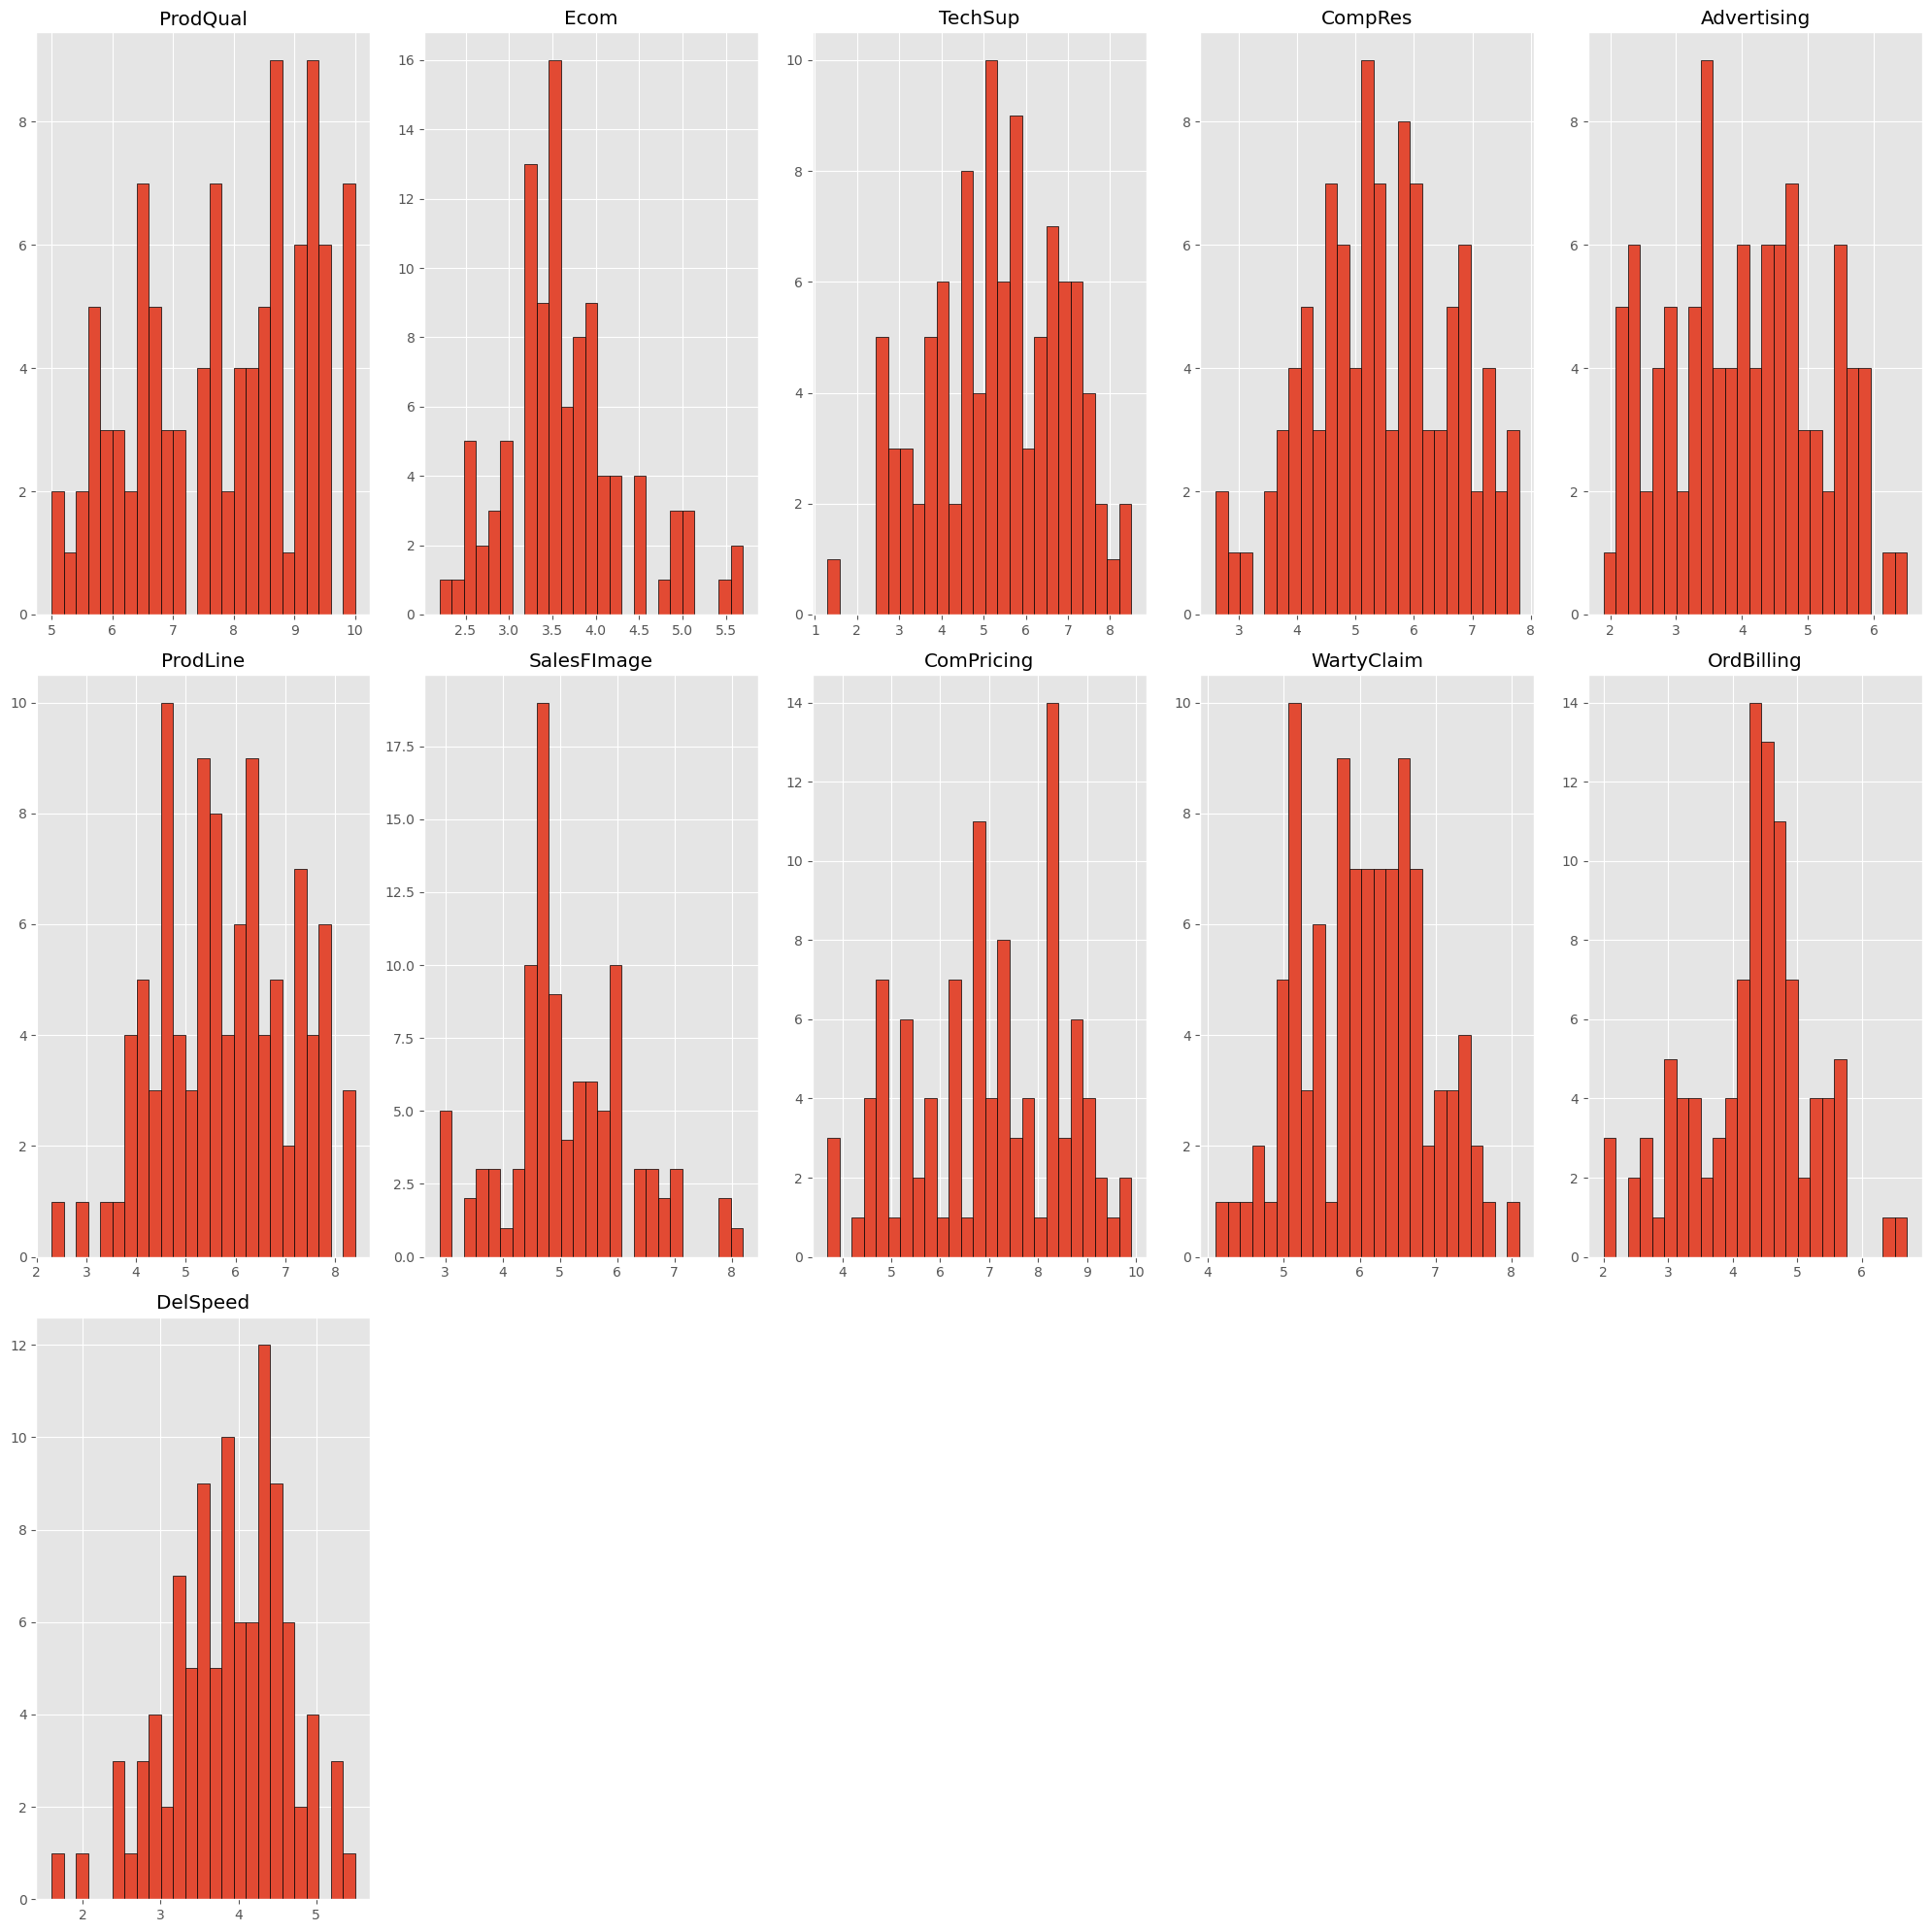

In [123]:
df.hist(bins=25, figsize=(20,20), layout=(-1, 5), edgecolor="black")
plt.tight_layout();


ProdQual
Skew : -0.24


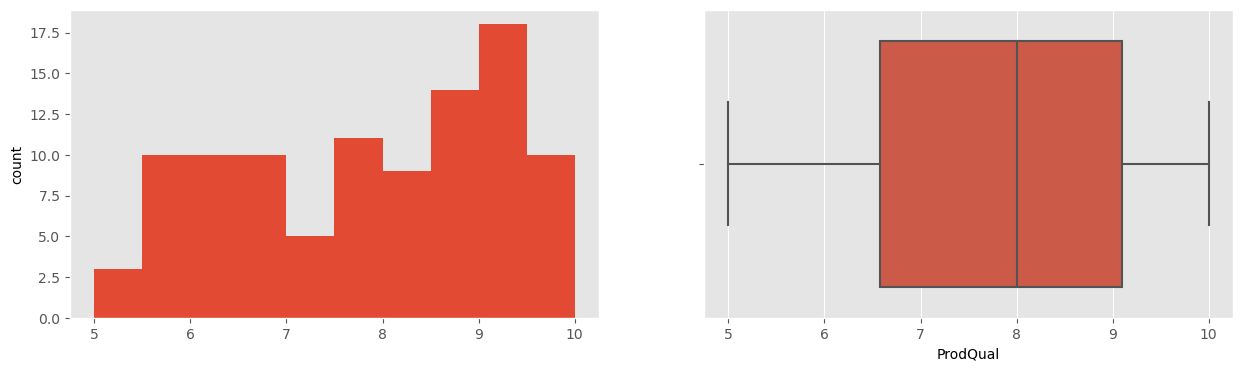

Ecom
Skew : 0.66


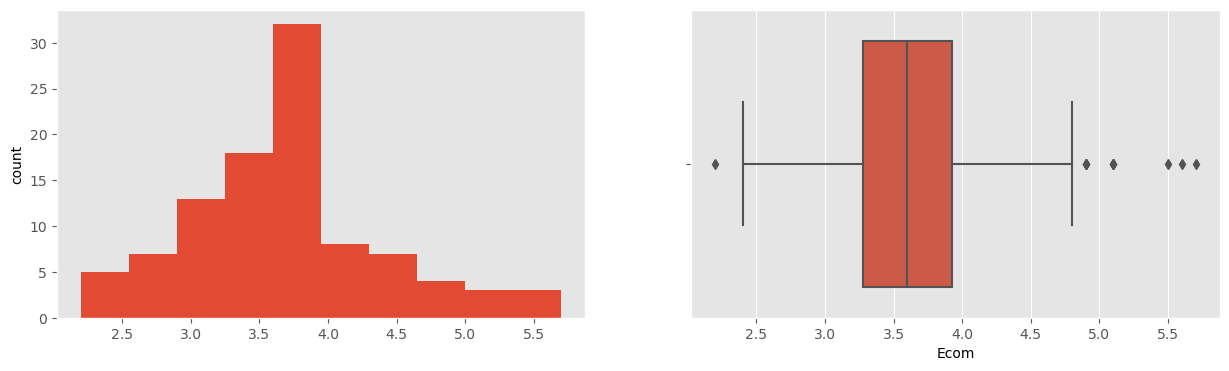

TechSup
Skew : -0.2


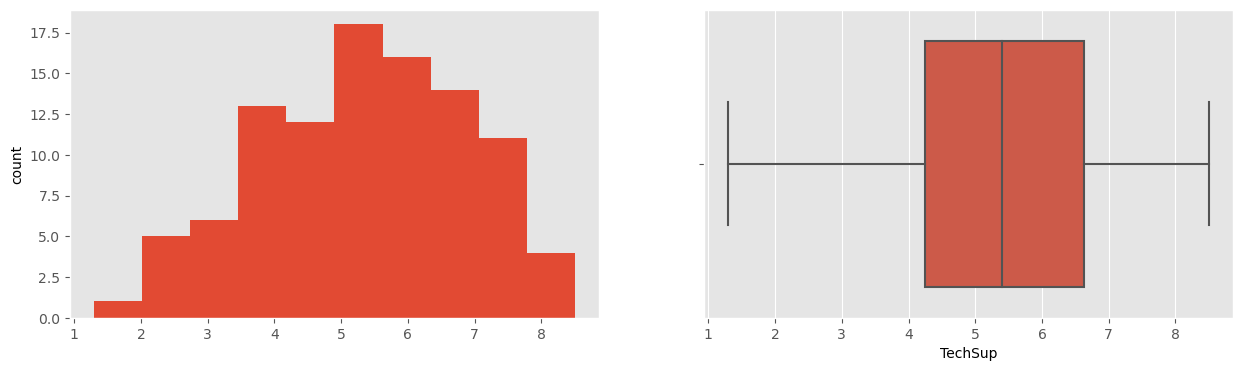

CompRes
Skew : -0.14


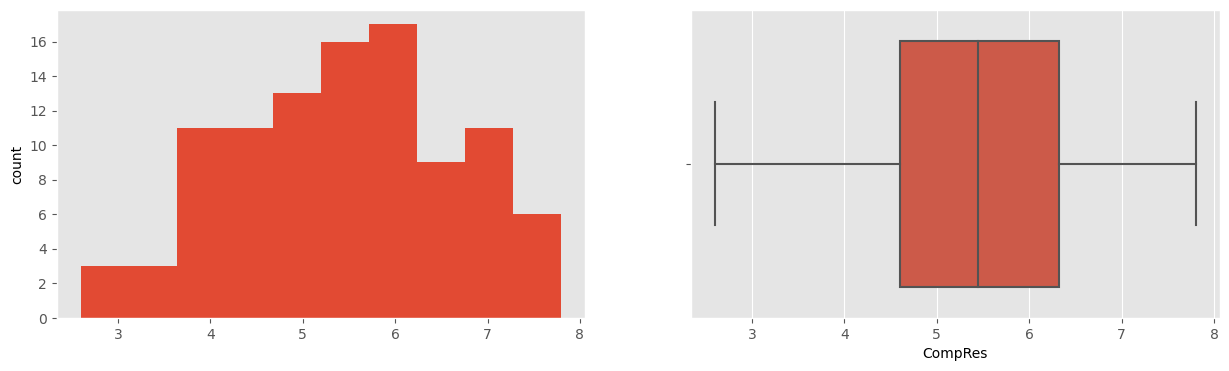

Advertising
Skew : 0.04


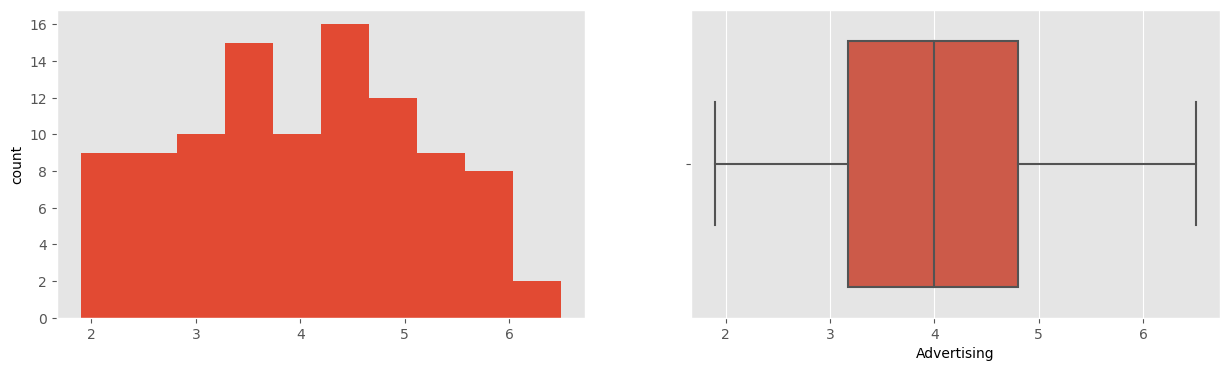

ProdLine
Skew : -0.09


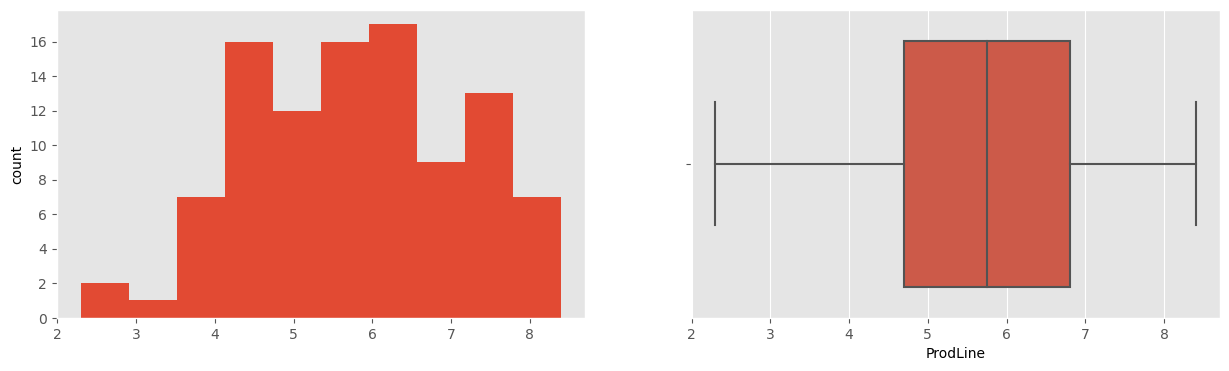

SalesFImage
Skew : 0.38


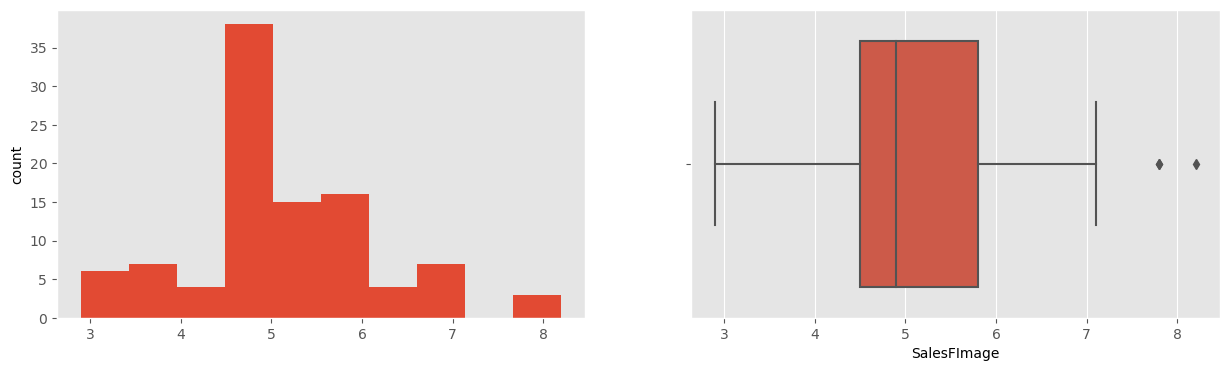

ComPricing
Skew : -0.24


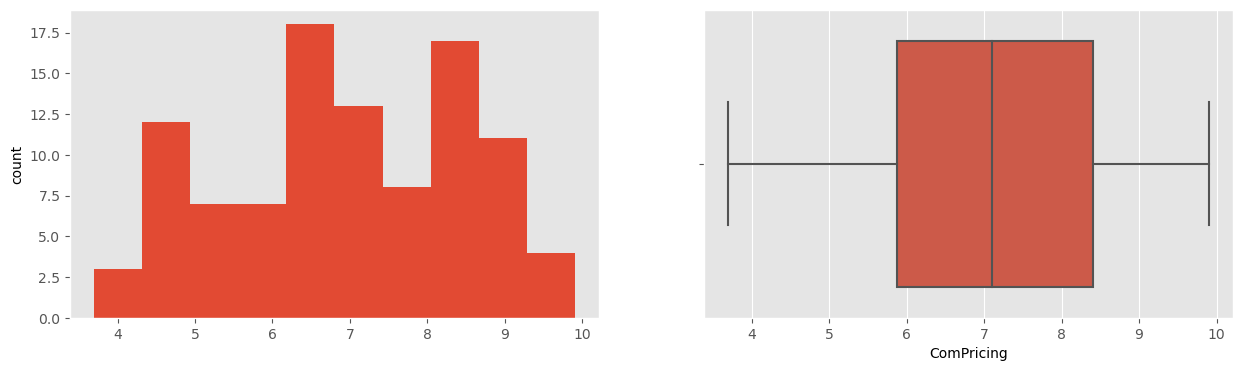

WartyClaim
Skew : 0.01


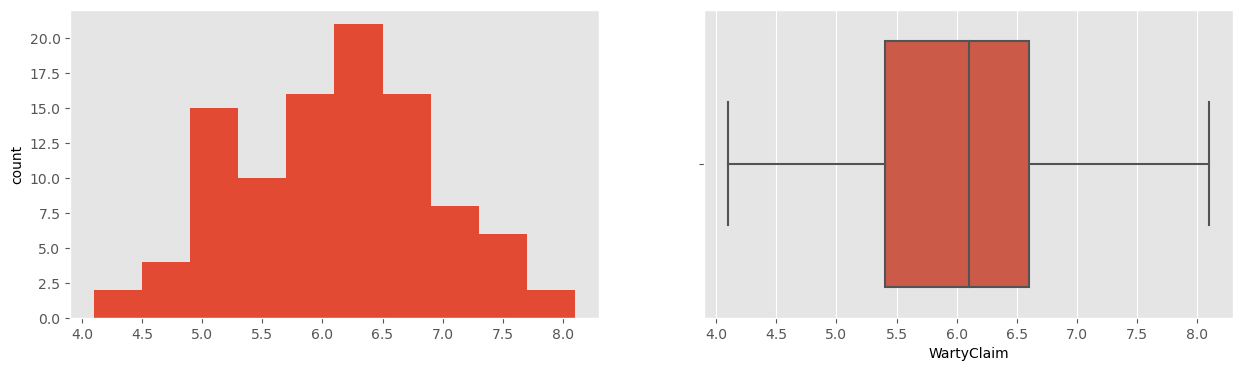

OrdBilling
Skew : -0.33


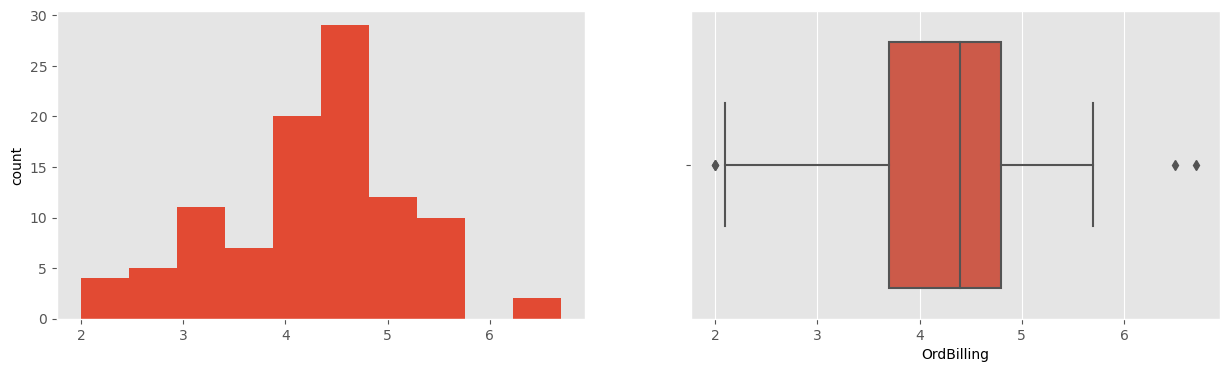

DelSpeed
Skew : -0.46


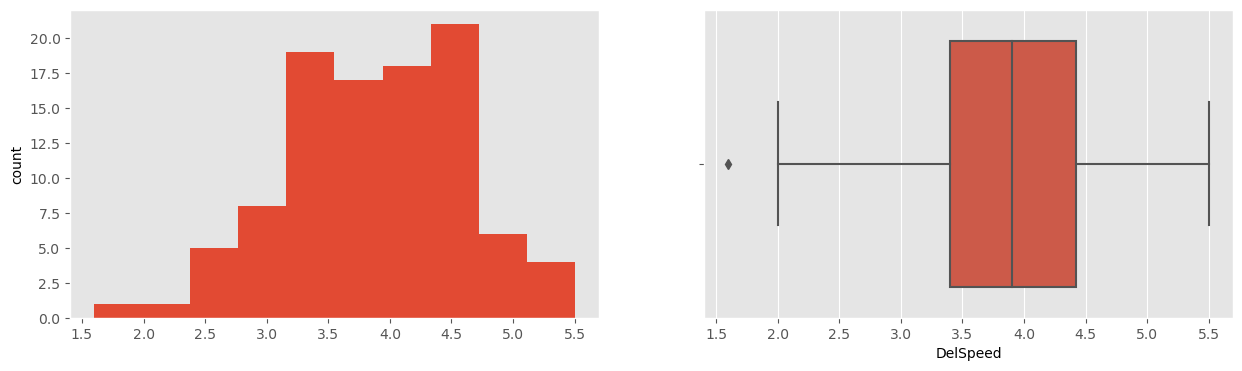

In [57]:
for col in df.columns[0:]:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [58]:
df.columns


Index(['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 'ProdLine',
       'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling', 'DelSpeed'],
      dtype='object')

SalesFImage is right skewed with outliers,Ecom ,ord billing and Delspeed also have outliers.
ecom ,advertising,Wartyclaim are positive skewed
ProdQual,TechSup,ComRes,ProdLine,Copmpricing,ordbilling,delspeed are negative skewed

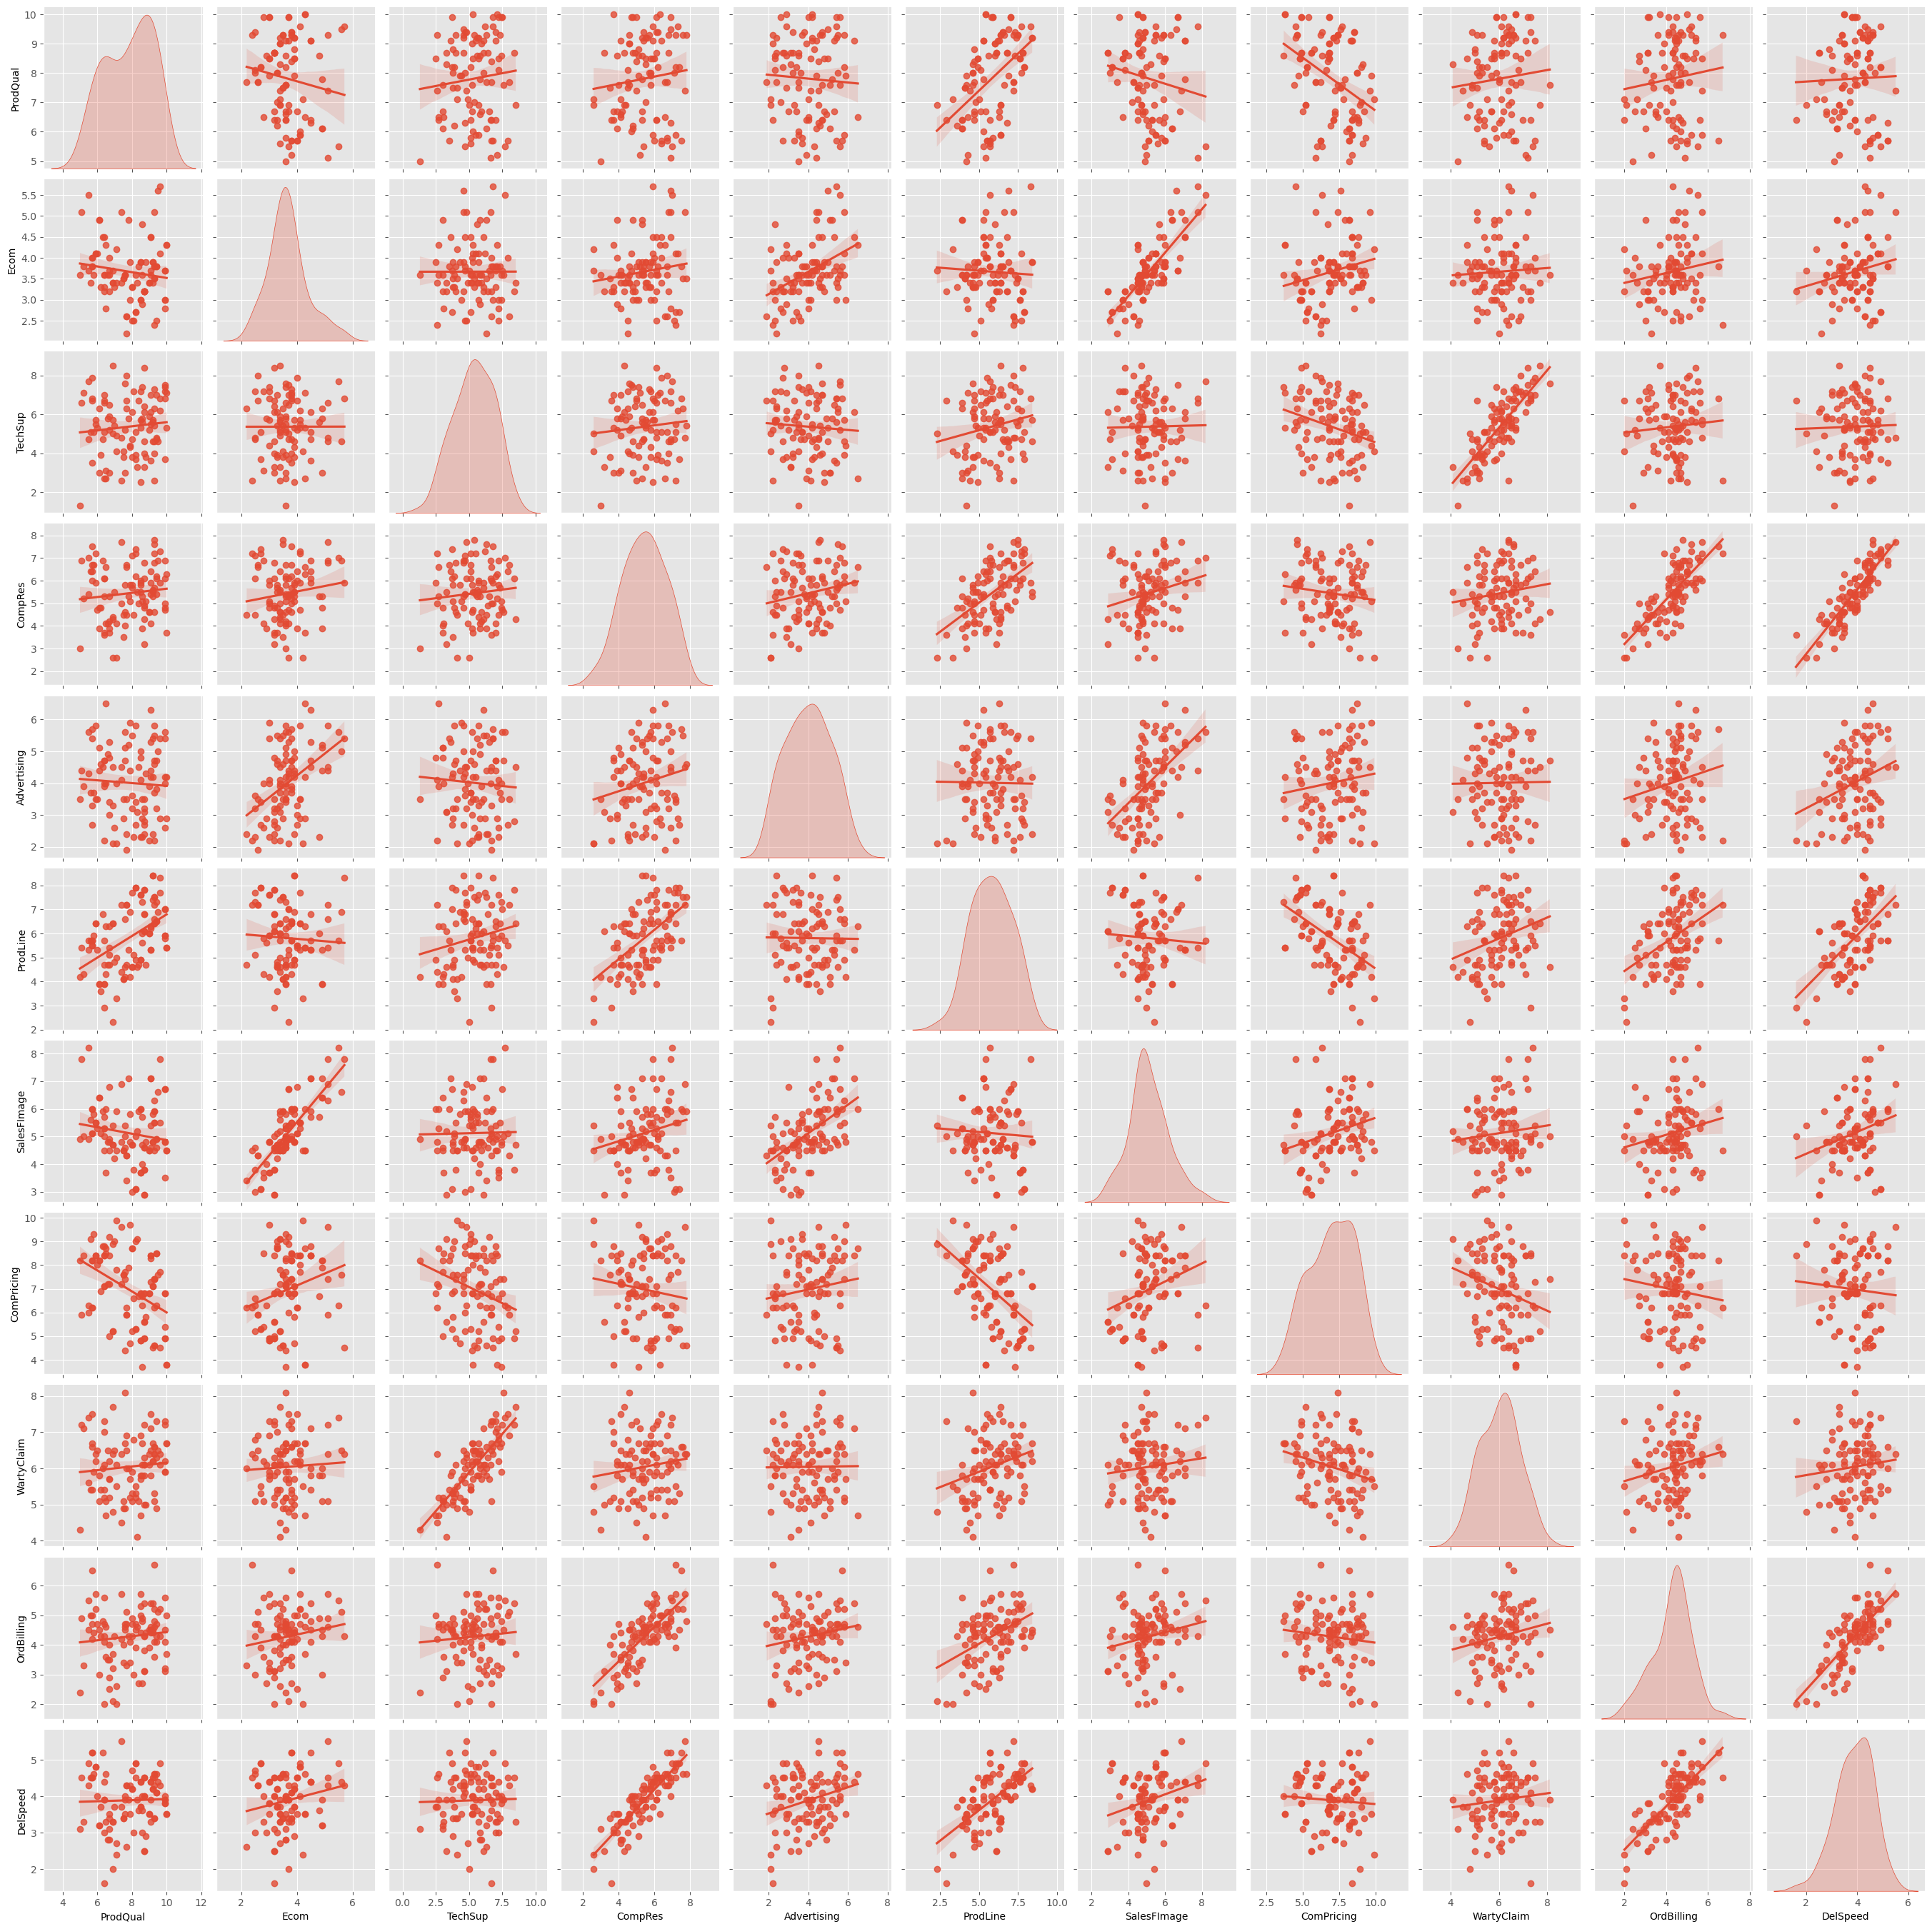

In [59]:
sns.pairplot(data = df, kind='reg', diag_kind = 'kde')

<Axes: >

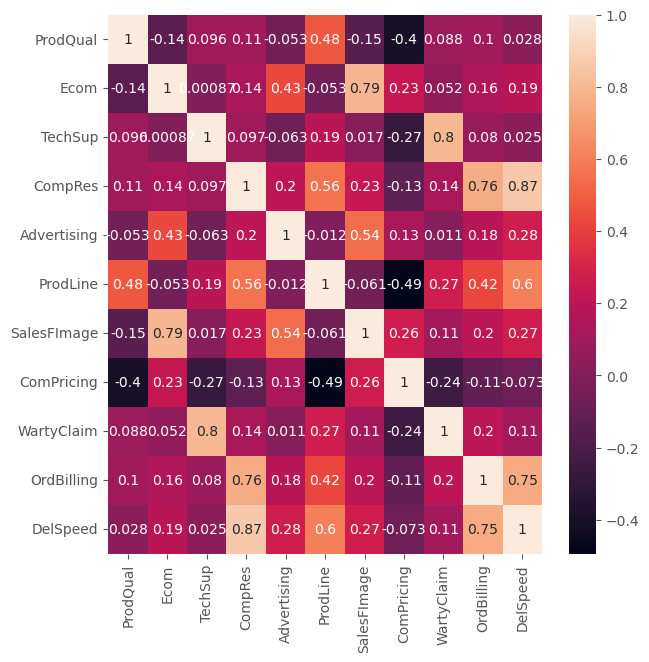

In [60]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

In [81]:
df.columns

Index(['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 'ProdLine',
       'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling', 'DelSpeed'],
      dtype='object')

In [88]:
a='Ecom'
b= 'SalesFImage'

C:\Users\karth\AppData\Local\Temp\ipykernel_21120\1168376031.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=a, y=b, data=df, palette='pastel')


<Axes: xlabel='Ecom', ylabel='SalesFImage'>

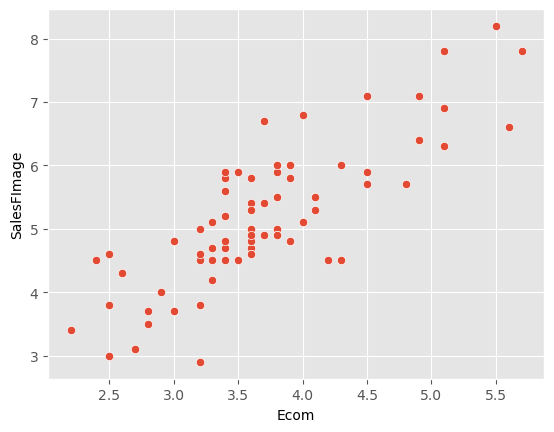

In [89]:
sns.scatterplot(x=a, y=b, data=df, palette='pastel')

In [90]:
a='TechSup'
b= 'WartyClaim'

C:\Users\karth\AppData\Local\Temp\ipykernel_21120\1168376031.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=a, y=b, data=df, palette='pastel')


<Axes: xlabel='TechSup', ylabel='WartyClaim'>

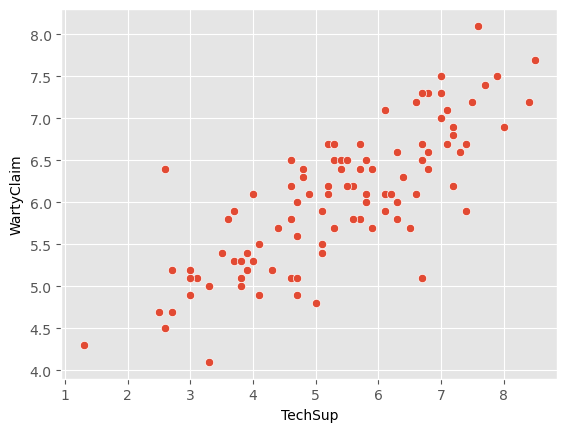

In [91]:
sns.scatterplot(x=a, y=b, data=df, palette='pastel')

In [92]:
a='DelSpeed'
b='OrdBilling'

C:\Users\karth\AppData\Local\Temp\ipykernel_21120\1168376031.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=a, y=b, data=df, palette='pastel')


<Axes: xlabel='DelSpeed', ylabel='OrdBilling'>

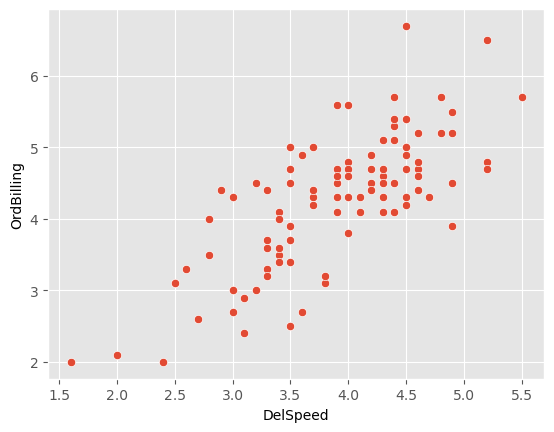

In [93]:
sns.scatterplot(x=a, y=b, data=df, palette='pastel')

In [94]:
a='DelSpeed'
b='ProdLine'

C:\Users\karth\AppData\Local\Temp\ipykernel_21120\1168376031.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=a, y=b, data=df, palette='pastel')


<Axes: xlabel='DelSpeed', ylabel='ProdLine'>

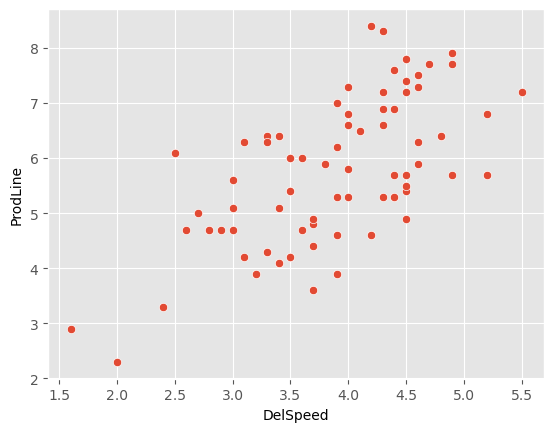

In [95]:
sns.scatterplot(x=a, y=b, data=df, palette='pastel')

In [96]:
a='DelSpeed'
b='CompRes'

C:\Users\karth\AppData\Local\Temp\ipykernel_21120\1168376031.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=a, y=b, data=df, palette='pastel')


<Axes: xlabel='DelSpeed', ylabel='CompRes'>

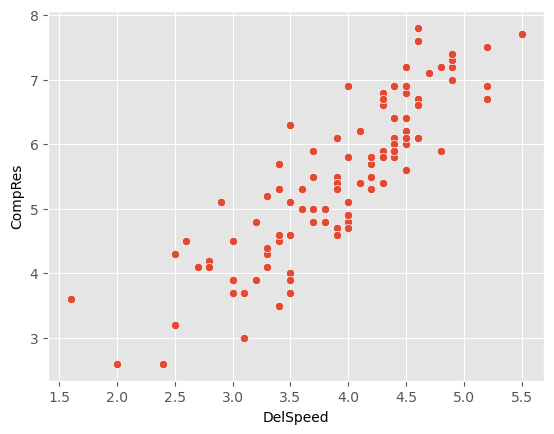

In [97]:
sns.scatterplot(x=a, y=b, data=df, palette='pastel')

In [98]:
a='OrdBilling'
b='CompRes'

C:\Users\karth\AppData\Local\Temp\ipykernel_21120\1168376031.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=a, y=b, data=df, palette='pastel')


<Axes: xlabel='DelSpeed', ylabel='OrdBilling'>

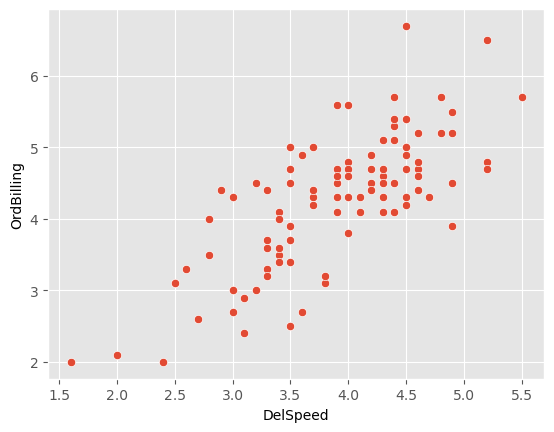

In [87]:
sns.scatterplot(x=a, y=b, data=df, palette='pastel')

In [124]:
df


,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6
96,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7
97,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5
98,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

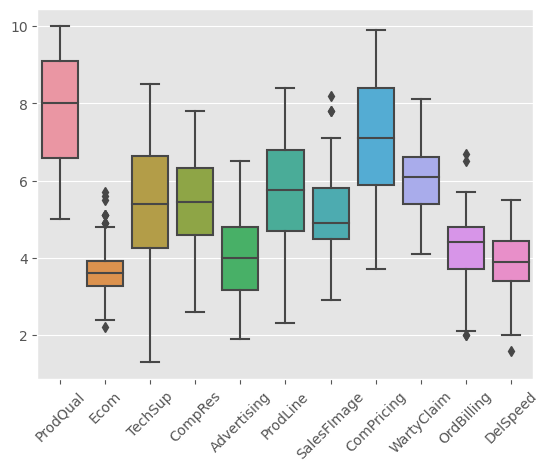

In [125]:
ax = sns.boxplot(data=df)
plt.setp(ax.get_xticklabels(), rotation=45)

In [126]:
#treating outliers:
def impute_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [127]:
#capping outliers:

for column in df:     
  lr,ur=impute_outlier(df[column])
  df[column]=np.where(df[column]>ur,ur,df[column])
  df[column]=np.where(df[column]<lr,lr,df[column])

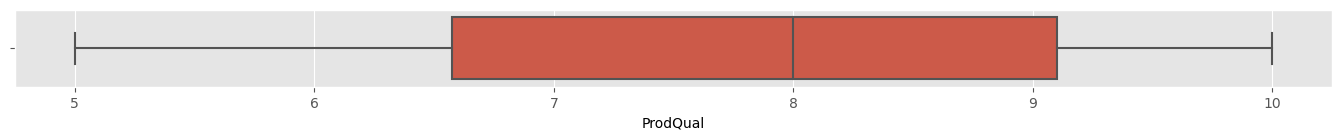

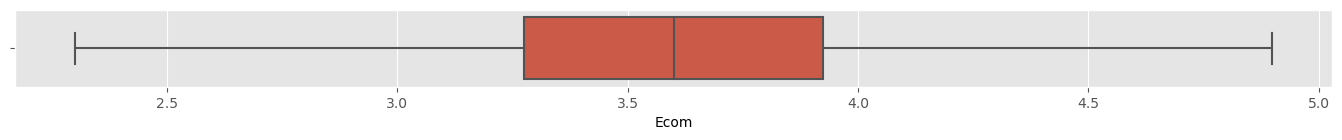

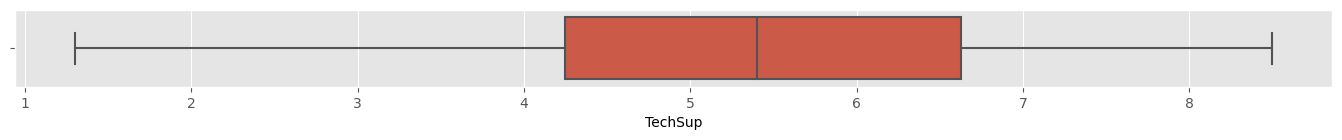

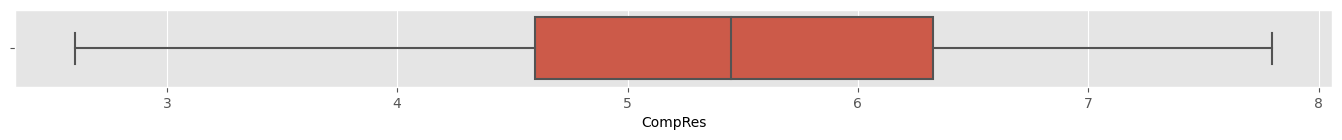

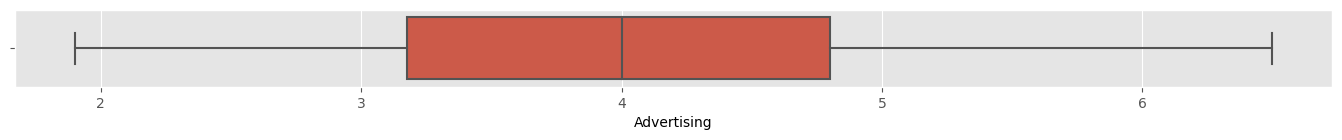

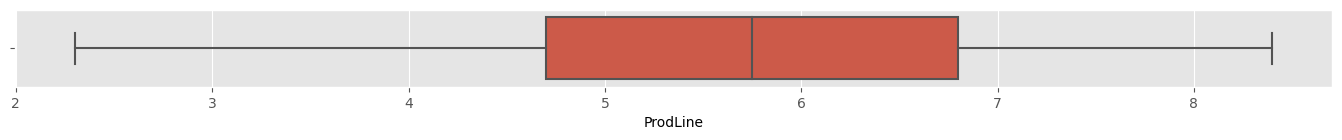

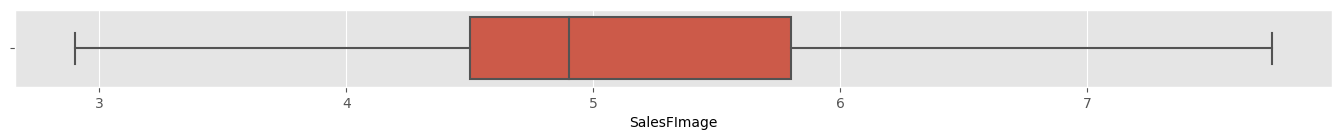

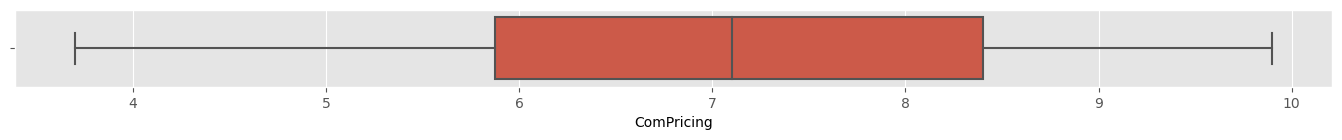

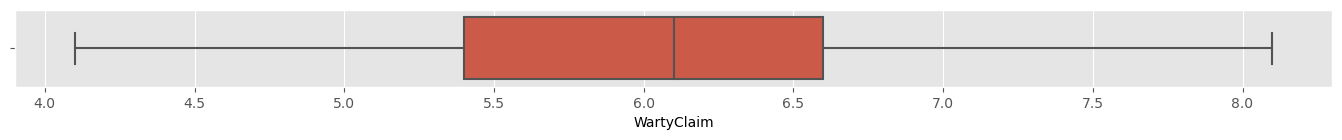

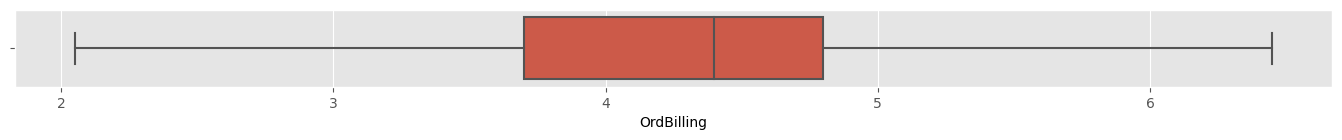

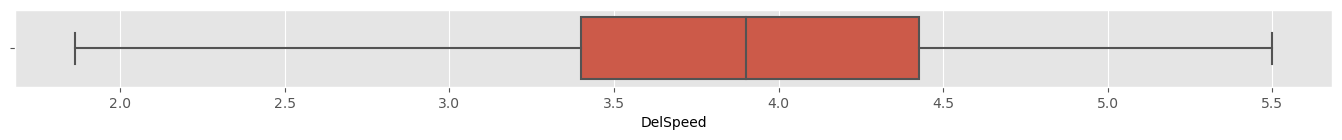

In [130]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

Outliers are treated with IQR method and compare results with model without outlier treatment. 

Outlier Detection and Treatment using IQR method 
 
In this method, any observation that is less than  Q1 – 1.5 IQR or more than Q3 + 1.5 IQR is considered an outlier.  
To treat outliers, we defined a function 'treat_outlier' where 
•	The larger values (>upper whisker) are all equated to the 95th percentile value of the distribution 
•	The smaller values (<lower whisker) are all equated to the 5th percentile value of the distribution. 




#pca model building
1.Standardizing the independent variables

PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler from Scikit Learn to standardize the dataset features onto unit scale (mean = 0 and standard deviation = 1) which is a requirement for the optimal performance of many Machine Learning algorithms.

#scaling
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_scaled.describe()
X=df_scaled
Y=df_scaled


outliers after scaling

In [110]:
#ax = sns.boxplot(data=df_scaled)
#plt.setp(ax.get_xticklabels(), rotation=45)

In [131]:
#before sclaing
df.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7.810000,3.64600,5.365000,5.442000,4.010000,5.805000,5.117500,6.974000,6.043000,4.276000,3.888625
std,1.396279,0.63555,1.530457,1.208403,1.126943,1.315285,1.057617,1.545055,0.819738,0.918895,0.726612
min,5.000000,2.30000,1.300000,2.600000,1.900000,2.300000,2.900000,3.700000,4.100000,2.050000,1.862500
25%,6.575000,3.27500,4.250000,4.600000,3.175000,4.700000,4.500000,5.875000,5.400000,3.700000,3.400000
50%,8.000000,3.60000,5.400000,5.450000,4.000000,5.750000,4.900000,7.100000,6.100000,4.400000,3.900000
75%,9.100000,3.92500,6.625000,6.325000,4.800000,6.800000,5.800000,8.400000,6.600000,4.800000,4.425000
max,10.000000,4.90000,8.500000,7.800000,6.500000,8.400000,7.750000,9.900000,8.100000,6.450000,5.500000


In [132]:
#aftter scaling

df_scaled.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,9.188483e-16,1.011413e-15,1.029177e-15,-1.432188e-16,-6.061818e-16,2.531308e-16,6.178391e-16,-7.105427e-16,-1.247891e-15,4.751755e-16,4.241052e-16,1.296740e-15
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.022630e+00,-2.111893e+00,-2.669451e+00,-2.363712e+00,-1.881755e+00,-2.678246e+00,-2.083519e+00,-2.129693e+00,-2.382210e+00,-2.464877e+00,-3.128268e+00,-1.870365e+00
25%,-8.889494e-01,-5.695798e-01,-7.322109e-01,-7.002976e-01,-7.446754e-01,-8.443545e-01,-5.839103e-01,-7.148848e-01,-7.883484e-01,-6.254166e-01,-6.650649e-01,-7.741184e-01
50%,1.367614e-01,-1.032991e-01,2.298420e-02,6.653659e-03,-8.918268e-03,-4.202669e-02,-2.090080e-01,8.196131e-02,6.988470e-02,1.320083e-01,1.915825e-02,1.113111e-01
75%,9.285383e-01,3.629816e-01,8.274312e-01,7.343976e-01,7.045432e-01,7.603011e-01,6.345221e-01,9.275939e-01,6.829084e-01,5.648226e-01,7.375925e-01,5.961892e-01
max,1.576356e+00,2.909592e+00,2.058728e+00,1.961166e+00,2.220649e+00,1.982896e+00,2.883936e+00,1.903324e+00,2.521979e+00,2.620690e+00,2.208672e+00,2.514620e+00


2.Generating the covariance or correlation matrix for all dimensions

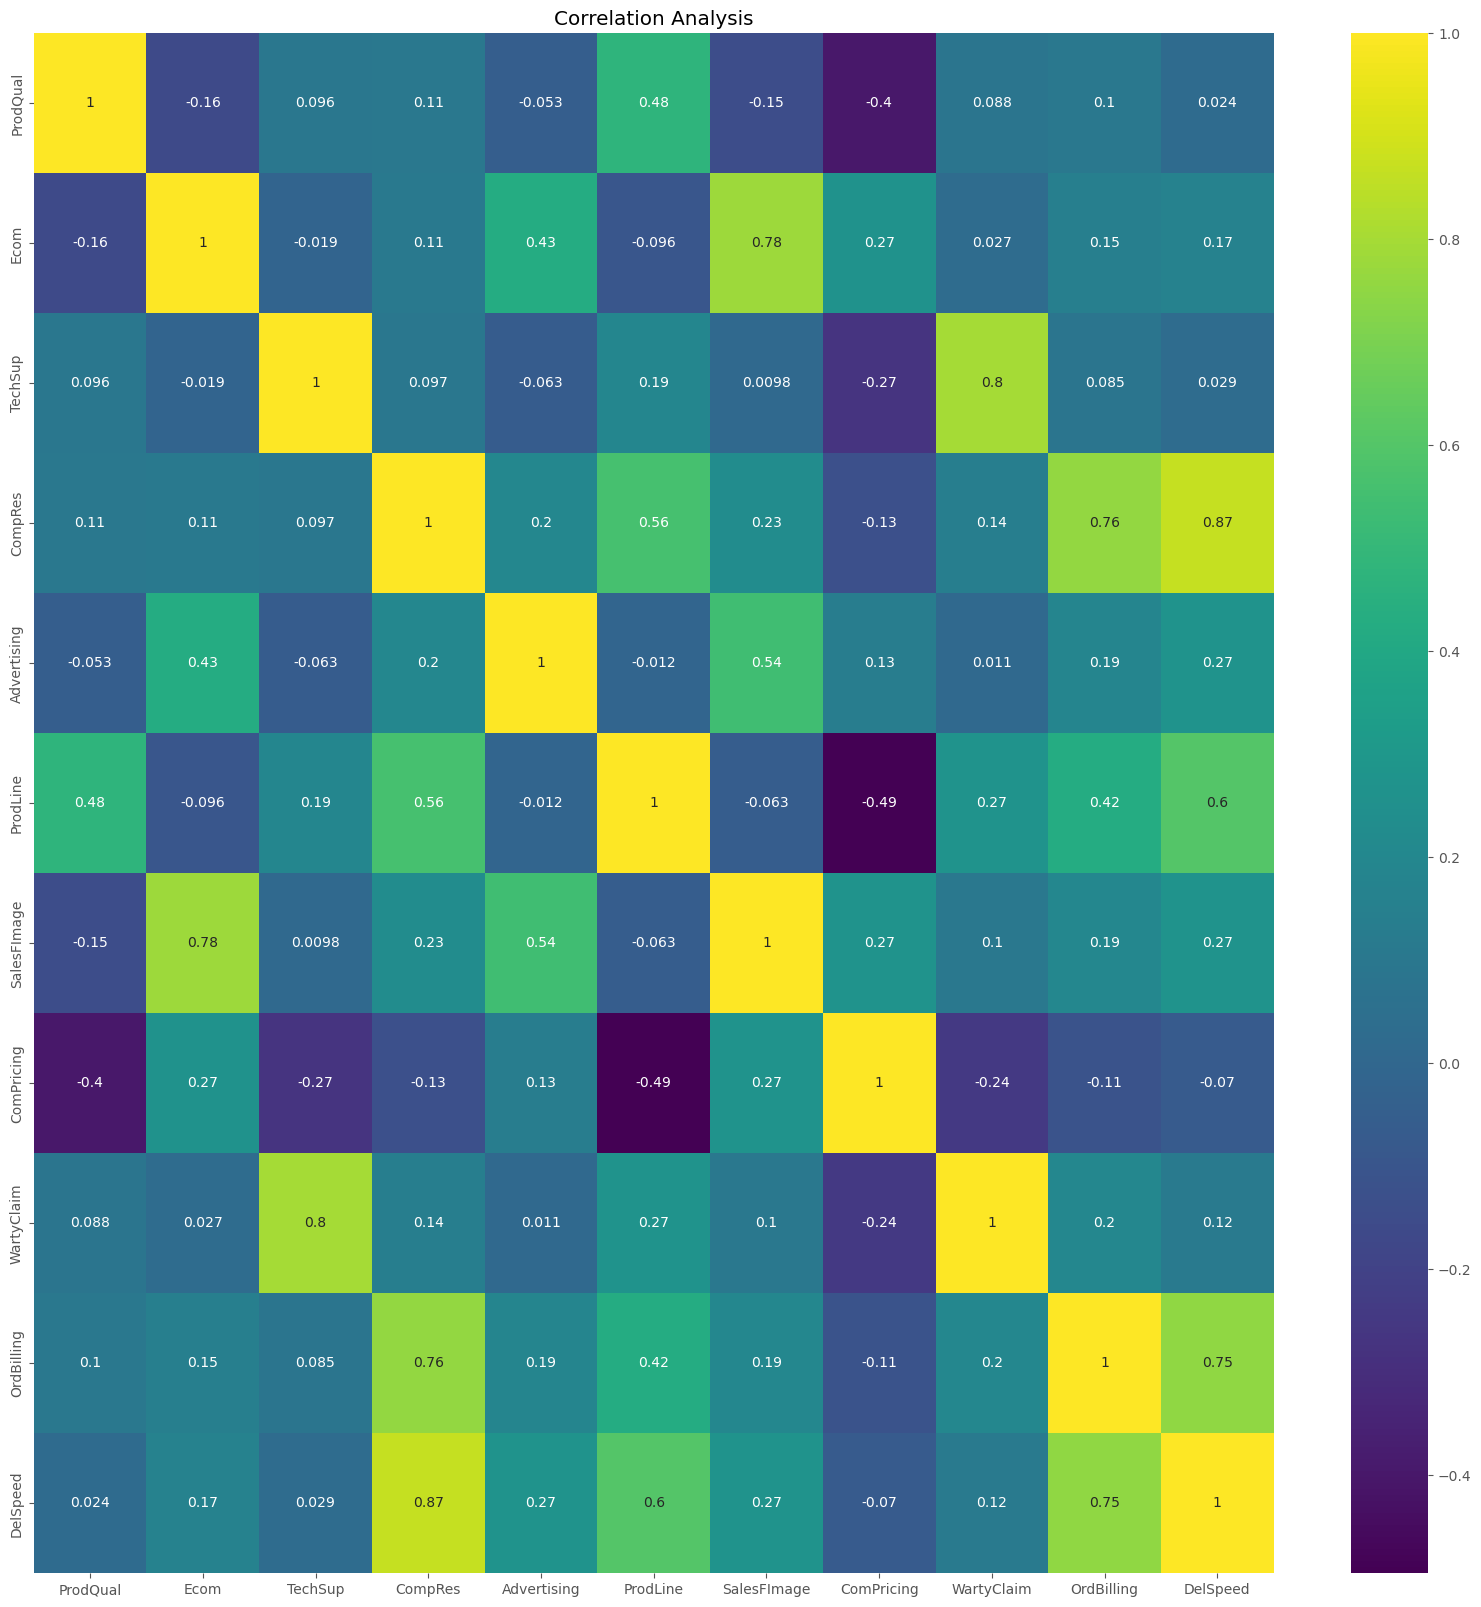

In [133]:
#Correlation Analysis:

matrix= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True,cmap='viridis',annot_kws = {'size': 10})
plt.title("Correlation Analysis")
plt.show()

In [134]:
#correlation matric
df.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.161588,0.095600,0.106370,-0.053473,0.477493,-0.146498,-0.401282,0.088312,0.102495,0.024332
Ecom,-0.161588,1.000000,-0.018786,0.109386,0.425123,-0.096342,0.779244,0.268064,0.027380,0.146505,0.168147
TechSup,0.095600,-0.018786,1.000000,0.096657,-0.062870,0.192625,0.009836,-0.270787,0.797168,0.085443,0.028898
CompRes,0.106370,0.109386,0.096657,1.000000,0.196917,0.561417,0.226647,-0.127954,0.140408,0.757995,0.868846
Advertising,-0.053473,0.425123,-0.062870,0.196917,1.000000,-0.011551,0.542923,0.134217,0.010792,0.188005,0.272973
ProdLine,0.477493,-0.096342,0.192625,0.561417,-0.011551,1.000000,-0.062584,-0.494948,0.273078,0.423870,0.600272
SalesFImage,-0.146498,0.779244,0.009836,0.226647,0.542923,-0.062584,1.000000,0.271246,0.100953,0.194695,0.271213
ComPricing,-0.401282,0.268064,-0.270787,-0.127954,0.134217,-0.494948,0.271246,1.000000,-0.244986,-0.113318,-0.070289
WartyClaim,0.088312,0.027380,0.797168,0.140408,0.010792,0.273078,0.100953,-0.244986,1.000000,0.198106,0.116168
OrdBilling,0.102495,0.146505,0.085443,0.757995,0.188005,0.423870,0.194695,-0.113318,0.198106,1.000000,0.752298


Principal Component Covariance Matrix
Mathematically, we obtain the covariance matrix from a given matrix by multiplying the matrix with its transpose form. The covariance matrix is nothing but the numerical form of the pair plot that we get from sns.pairplot().

In [135]:
#covariance matrix
df.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.949596,-0.143394,0.204293,0.179475,-0.084141,0.876919,-0.216338,-0.865697,0.101081,0.131505,0.024686
Ecom,-0.143394,0.403923,-0.018273,0.084008,0.304485,-0.080535,0.523783,0.263228,0.014265,0.085560,0.077650
TechSup,0.204293,-0.018273,2.342298,0.178758,-0.108434,0.387753,0.015922,-0.640313,1.000106,0.120162,0.032136
CompRes,0.179475,0.084008,0.178758,1.460238,0.268162,0.892313,0.289662,-0.238897,0.139085,0.841675,0.762882
Advertising,-0.084141,0.304485,-0.108434,0.268162,1.270000,-0.017121,0.647096,0.233697,0.009970,0.194687,0.223524
ProdLine,0.876919,-0.080535,0.387753,0.892313,-0.017121,1.729975,-0.087058,-1.005828,0.294429,0.512293,0.573681
SalesFImage,-0.216338,0.523783,0.015922,0.289662,0.647096,-0.087058,1.118554,0.443237,0.087523,0.189212,0.208421
ComPricing,-0.865697,0.263228,-0.640313,-0.238897,0.233697,-1.005828,0.443237,2.387196,-0.310285,-0.160883,-0.078910
WartyClaim,0.101081,0.014265,1.000106,0.139085,0.009970,0.294429,0.087523,-0.310285,0.671971,0.149224,0.069194
OrdBilling,0.131505,0.085560,0.120162,0.841675,0.194687,0.512293,0.189212,-0.160883,0.149224,0.844368,0.502294


3.Eigen Decomposition

During this process, we get two outputs as below:

Eigen Vectors: These are the new dimensions of the new mathematical space, and

Eigenvalues: This is the information content of each one of these eigenvectors. It is the spread or the variance of the data on each of the eigenvectors.

In [137]:
# The PCA model implementation
pca = PCA()
df_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
exp_var = pca.explained_variance_ratio_


[0.336905   0.2127437  0.14101868 0.1014622  0.05299691 0.04737761
 0.03356898 0.02704001 0.01967829 0.01201863 0.00826154 0.00692845]


The explained variance ratio function in the PCA class returns the variance produced by each principal component.

In [138]:
print("Eigenvalues: ")
print(np.round(exp_var,3))

Eigenvalues: 
[0.337 0.213 0.141 0.101 0.053 0.047 0.034 0.027 0.02  0.012 0.008 0.007]


The first principal component explains 28.68% of the total variation in the 
dataset.
The second principal component explains 21.296% of the total variation.
The third principal component explains 14.38% of the total variation.
The fourth principal component explains 10.28% of the total variation.

In [139]:
eigenvector=pca.components_
print("Eigenvector: ")
print(np.round(eigenvector,3))

Eigenvector: 
[[-0.159 -0.166 -0.125 -0.423 -0.181 -0.353 -0.218  0.135 -0.175 -0.388
  -0.422 -0.413]
 [-0.313  0.441 -0.238  0.001  0.357 -0.298  0.465  0.418 -0.201  0.009
   0.054  0.024]
 [ 0.074 -0.237 -0.616  0.197 -0.09   0.111 -0.241  0.052 -0.605  0.155
   0.218  0.029]
 [ 0.614  0.196 -0.179 -0.28   0.206  0.1    0.199 -0.241 -0.19  -0.307
  -0.29   0.331]
 [-0.25  -0.189 -0.04  -0.033  0.761  0.025 -0.142 -0.49  -0.022 -0.049
   0.062 -0.23 ]
 [ 0.365 -0.465  0.124  0.015  0.419 -0.196 -0.167  0.586  0.142  0.091
  -0.031  0.143]
 [ 0.126  0.008 -0.013 -0.005 -0.072 -0.634  0.022 -0.343 -0.04   0.629
  -0.237  0.075]
 [-0.327 -0.508  0.082  0.149 -0.123 -0.223  0.334 -0.163 -0.107 -0.335
  -0.001  0.529]
 [-0.186 -0.216 -0.548 -0.437 -0.042  0.232  0.17   0.029  0.504  0.252
  -0.075  0.137]
 [ 0.204  0.037 -0.425  0.586 -0.028 -0.254  0.04  -0.086  0.454 -0.321
  -0.058 -0.216]
 [ 0.229 -0.029 -0.018 -0.379 -0.097 -0.347  0.074 -0.107  0.083 -0.158
   0.783 -0.106]
 [-0.21

In [140]:
 #find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  7


In [ ]:
#create scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

We can see that the first two features have the most variance here. Now we train the model.

Optimum no of components =7

In [142]:
pca = PCA(n_components=7,random_state=123)
df_pca = pca.fit_transform(X)
df_pca.transpose()#component output


array([[-4.90389228e-01, -4.95644452e-01, -2.72790876e+00,
         2.23686406e+00,  6.44060603e-01,  3.44531358e+00,
         5.18665307e+00,  1.56754726e+00, -5.45533589e-01,
         8.77543506e-02,  3.53037083e-01,  1.96981413e+00,
        -3.06018020e+00, -1.27714330e+00, -2.17494763e+00,
        -9.38724935e-01, -2.92413570e-01, -1.87002667e+00,
        -3.09493250e-01, -1.46257880e+00,  1.83470422e+00,
        -3.99103340e+00, -1.09616365e+00, -2.31648391e+00,
         1.03946605e+00, -1.29134992e-01, -1.28835678e+00,
         1.55129955e+00, -8.77133855e-01,  1.98974823e+00,
         5.14615167e-01,  2.19643426e+00,  1.50934230e+00,
        -2.22604159e-01,  1.80964165e+00,  2.50030358e+00,
         5.00000995e-01, -2.97934534e+00, -6.03818265e-01,
         1.33227969e+00,  1.04560651e+00, -1.57953301e-01,
        -2.49341218e+00, -2.34165757e+00, -2.20629637e-01,
        -1.63328734e+00, -9.91194739e-01, -2.99607203e+00,
        -1.72113662e+00, -1.36829741e+00,  2.36516594e+0

In [143]:
pca_index = ['PC1','PC2','PC3','PC4','PC5','PC6','Pc7']
data_pca = pd.DataFrame(pca.components_,index=pca_index,columns=list(df_scaled.columns))
data_pca.shape

(7, 12)

In [144]:
data_pca=np.round(data_pca,2)
data_pca.transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,Pc7
ProdQual,-0.16,-0.31,0.07,0.61,-0.25,0.36,0.13
Ecom,-0.17,0.44,-0.24,0.20,-0.19,-0.47,0.01
TechSup,-0.13,-0.24,-0.62,-0.18,-0.04,0.12,-0.01
CompRes,-0.42,0.00,0.20,-0.28,-0.03,0.01,-0.00
Advertising,-0.18,0.36,-0.09,0.21,0.76,0.42,-0.07
ProdLine,-0.35,-0.30,0.11,0.10,0.03,-0.20,-0.63
SalesFImage,-0.22,0.46,-0.24,0.20,-0.14,-0.17,0.02
ComPricing,0.13,0.42,0.05,-0.24,-0.49,0.59,-0.34
WartyClaim,-0.17,-0.20,-0.61,-0.19,-0.02,0.14,-0.04
OrdBilling,-0.39,0.01,0.16,-0.31,-0.05,0.09,0.63


In [147]:
data_pca.style.highlight_max(color="lightgreen",axis=0)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
PC1,-0.160000,-0.170000,-0.130000,-0.420000,-0.180000,-0.350000,-0.220000,0.130000,-0.170000,-0.390000,-0.420000,-0.410000
PC2,-0.310000,0.440000,-0.240000,0.000000,0.360000,-0.300000,0.460000,0.420000,-0.200000,0.010000,0.050000,0.020000
PC3,0.070000,-0.240000,-0.620000,0.200000,-0.090000,0.110000,-0.240000,0.050000,-0.610000,0.160000,0.220000,0.030000
PC4,0.610000,0.200000,-0.180000,-0.280000,0.210000,0.100000,0.200000,-0.240000,-0.190000,-0.310000,-0.290000,0.330000
PC5,-0.250000,-0.190000,-0.040000,-0.030000,0.760000,0.030000,-0.140000,-0.490000,-0.020000,-0.050000,0.060000,-0.230000
PC6,0.360000,-0.470000,0.120000,0.010000,0.420000,-0.200000,-0.170000,0.590000,0.140000,0.090000,-0.030000,0.140000
Pc7,0.130000,0.010000,-0.010000,-0.000000,-0.070000,-0.630000,0.020000,-0.340000,-0.040000,0.630000,-0.240000,0.080000


In [148]:
print("Linear expression of PC1 :")
for i in range(0,11):
    print(" (",np.round(pca.components_[0][i],2),")",'*',df.columns[i], end=' + ')


Linear expression of PC1 :
 ( -0.16 ) * ProdQual +  ( -0.17 ) * Ecom +  ( -0.13 ) * TechSup +  ( -0.42 ) * CompRes +  ( -0.18 ) * Advertising +  ( -0.35 ) * ProdLine +  ( -0.22 ) * SalesFImage +  ( 0.13 ) * ComPricing +  ( -0.17 ) * WartyClaim +  ( -0.39 ) * OrdBilling +  ( -0.42 ) * DelSpeed + 

By selecting the optimum number of componentd, the PCA accuracy improved.
PCA can be an excellent way to understand which features are more relevant for a particular machine learning problem.
